(60000, 28, 28)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 5, 5, 96)          11712     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 2, 96)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 2, 2, 256)         614656    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 1, 1, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 384)         885120    
                                                                 
 conv2d_18 (Conv2D)          (None, 1,

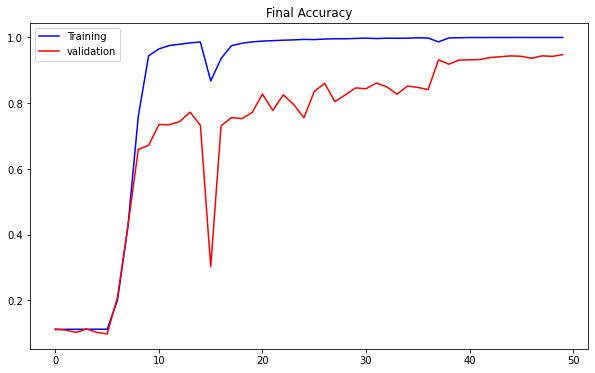

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 21ms/step


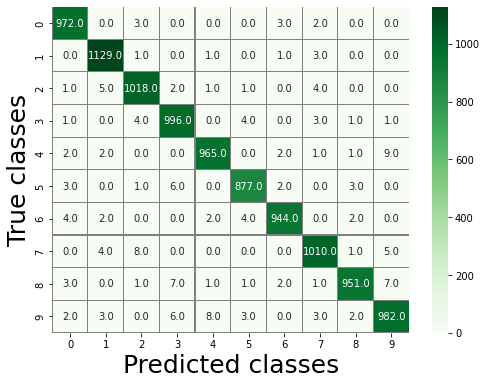

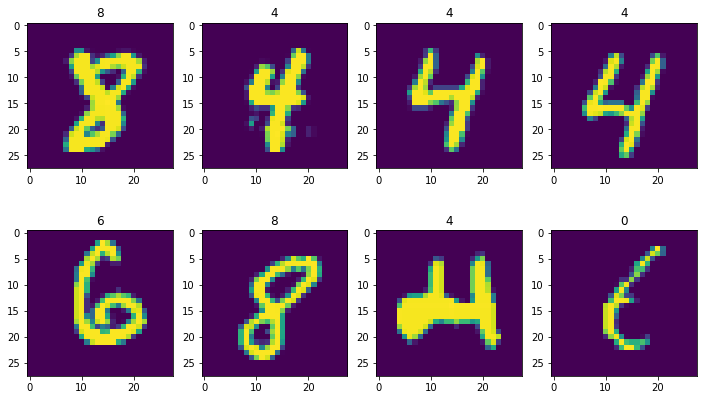

In [4]:
#AlexNet with MNIST Dataset
import numpy as n
import torch
import time
import platform
from keras.datasets import mnist
(tx, ty), (tsx, tsy) = mnist.load_data()
print(tx.shape)


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from keras.optimizers import SGD
from keras.metrics import categorical_crossentropy


def alnet():
  m = Sequential()
  m.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', activation='relu', input_shape = (28,28,1)))
  m.add(MaxPooling2D(pool_size = (3,3), strides = 2))
  m.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
  m.add(MaxPooling2D(pool_size = (3,3), strides = 2,padding='same'))
  m.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  m.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  m.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  m.add(MaxPooling2D(pool_size = (3,3), strides = 2,padding='same'))
  m.add(Flatten())
  m.add(Dense(4096, activation = 'relu'))
  m.add(Dropout(0.5))
  m.add(Dense(4096, activation = 'relu'))
  m.add(Dropout(0.5))
  m.add(Dense(10, activation = 'softmax'))
  ot = SGD(learning_rate = 0.1)
  m.compile(loss = categorical_crossentropy,
                optimizer = ot,
                metrics = ['accuracy'])

  return m
am = alnet()
am.summary()

import matplotlib.pyplot as p

from keras.utils import to_categorical
def pd(tx, ty, tsx, tsy):
  tx = tx.reshape(tx.shape[0], tx.shape[1], tx.shape[2], 1)
  tsx = tsx.reshape(tsx.shape[0], tsx.shape[1], tsx.shape[2], 1)
  tx = tx.astype('float32')
  tsx = tsx.astype('float32')
  tx = tx/255.0
  tsxn = tsx/255.0
  ty = to_categorical(ty)
  tsy = to_categorical(tsy)
  
  return tx, ty, tsx, tsy

def final(h):
  p.figure(figsize = (10,6))
  p.plot(h.history['accuracy'], color = 'blue', label = 'Training')
  p.plot(h.history['val_accuracy'], color = 'red', label = 'validation')
  p.legend()
  p.title('Final Accuracy')
  p.show()

def tmdl(m, tx, ty, tsx, tsy, ep = 50, bs = 128):
  tx,ty, tsx, tsy = pd(tx, ty, tsx, tsy)
  h = m.fit(tx, ty, epochs = ep, batch_size = bs, 
                      steps_per_epoch = tx.shape[0]//bs, 
                      validation_data = (tsx, tsy), 
                      validation_steps = tsx.shape[0]//bs, verbose = 1)

  _, accuracy = m.evaluate(tsx, tsy, verbose = 1)
  print('%.3f' % (accuracy * 100.0))
  final(h)
tmdl(am,tx,ty,tsx,tsy)


ystpred = []
for z in range(len(tsx)):
  ig = tsx[z]
  ig = ig.reshape(1,28,28,1)
  ig = ig.astype('float32')
  ig = ig/255.0
  vect = am.predict(ig)
  yp = n.argmax(vect)
  ystpred.append(yp)
  
ystpred = n.asarray(ystpred)

from sklearn.metrics import confusion_matrix
import seaborn as s 
confuma = confusion_matrix(tsy, ystpred)

p.figure(figsize = (8,6))
s.heatmap(confuma, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
p.xlabel('Predicted classes', fontsize = 25)
p.ylabel('True classes', fontsize = 25)
import numpy as np
ip = ['0','1','2','3','4','5','6','7','8','9']
import random
p.figure(figsize = (12,7))
for y in range(8):
  id = random.randint(0,len(tsx))
  ig = tsx[id]
  ig = ig.reshape(1,28,28,1)
  ig = ig.astype('float32')
  ig = ig/255
  vecp = am.predict(ig)
  vec_p = np.argmax(vecp,axis=1)
  p.subplot(240+1+y)
  p.imshow(tsx[id])
  p.title(ip[vec_p[0]])



Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 31ms/step


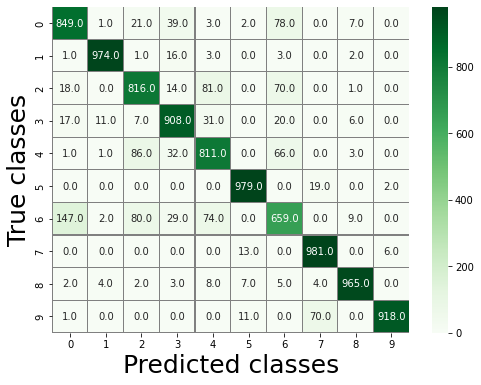

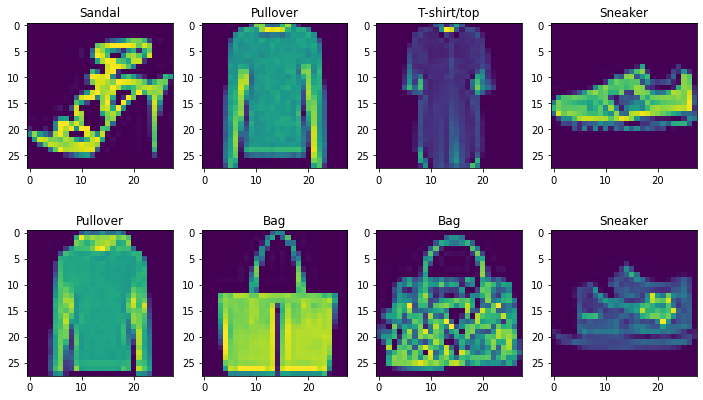

In [2]:
#AlexNet with FashionMNIST Dataset
import numpy as n
import torch
import time
import platform
from keras.datasets import fashion_mnist
(tx, ty), (tsx, tsy) = fashion_mnist.load_data()
print(tx.shape)


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from keras.optimizers import SGD
from keras.metrics import categorical_crossentropy


def alnet():
  m = Sequential()
  m.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', activation='relu', input_shape = (28,28,1)))
  m.add(MaxPooling2D(pool_size = (3,3), strides = 2))
  m.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
  m.add(MaxPooling2D(pool_size = (3,3), strides = 2,padding='same'))
  m.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  m.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  m.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  m.add(MaxPooling2D(pool_size = (3,3), strides = 2,padding='same'))
  m.add(Flatten())
  m.add(Dense(4096, activation = 'relu'))
  m.add(Dropout(0.5))
  m.add(Dense(4096, activation = 'relu'))
  m.add(Dropout(0.5))
  m.add(Dense(10, activation = 'softmax'))
  ot = SGD(lr = 0.1)
  m.compile(loss = categorical_crossentropy,
                optimizer = ot,
                metrics = ['accuracy'])

  return m
am = alnet()
am.summary()

import matplotlib.pyplot as p

from keras.utils import to_categorical
def pd(tx, ty, tsx, tsy):
  tx = tx.reshape(tx.shape[0], tx.shape[1], tx.shape[2], 1)
  tsx = tsx.reshape(tsx.shape[0], tsx.shape[1], tsx.shape[2], 1)
  tx = tx.astype('float32')
  tsx = tsx.astype('float32')
  tx = tx/255.0
  tsxn = tsx/255.0
  ty = to_categorical(ty)
  tsy = to_categorical(tsy)
  
  return tx, ty, tsx, tsy

def final(h):
  p.figure(figsize = (10,6))
  p.plot(h.history['accuracy'], color = 'blue', label = 'Training')
  p.plot(h.history['val_accuracy'], color = 'red', label = 'validation')
  p.legend()
  p.title('Final Accuracy')
  p.show()

def tmdl(m, tx, ty, tsx, tsy, ep = 50, bs = 128):
  tx,ty, tsx, tsy = pd(tx, ty, tsx, tsy)
  h = m.fit(tx, ty, epochs = ep, batch_size = bs, 
                      steps_per_epoch = tx.shape[0]//bs, 
                      validation_data = (tsx, tsy), 
                      validation_steps = tsx.shape[0]//bs, verbose = 1)

  _, accuracy = m.evaluate(tsx, tsy, verbose = 1)
  print('%.3f' % (accuracy * 100.0))
  final(h)
tmdl(am,tx,ty,tsx,tsy)


ystpred = []
for z in range(len(tsx)):
  ig = tsx[z]
  ig = ig.reshape(1,28,28,1)
  ig = ig.astype('float32')
  ig = ig/255.0
  vect = am.predict(ig)
  yp = n.argmax(vect)
  ystpred.append(yp)
  
ystpred = n.asarray(ystpred)

from sklearn.metrics import confusion_matrix
import seaborn as s 
confuma = confusion_matrix(tsy, ystpred)

p.figure(figsize = (8,6))
s.heatmap(confuma, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
p.xlabel('Predicted classes', fontsize = 25)
p.ylabel('True classes', fontsize = 25)
import numpy as np
ip = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
import random
p.figure(figsize = (12,7))
for y in range(8):
  id = random.randint(0,len(tsx))
  ig = tsx[id]
  ig = ig.reshape(1,28,28,1)
  ig = ig.astype('float32')
  ig = ig/255
  vecp = am.predict(ig)
  vec_p = np.argmax(vecp,axis=1)
  p.subplot(240+1+y)
  p.imshow(tsx[id])
  p.title(ip[vec_p[0]])



(50000, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 96)          34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 1

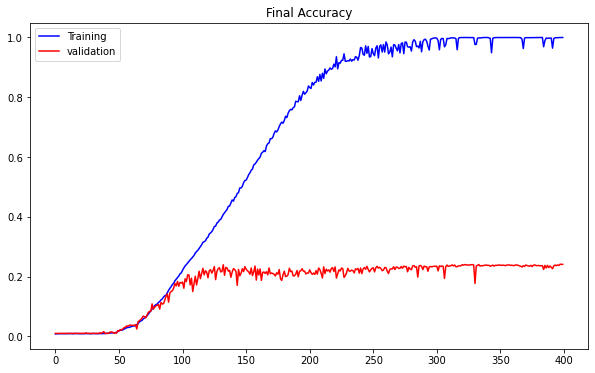

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step


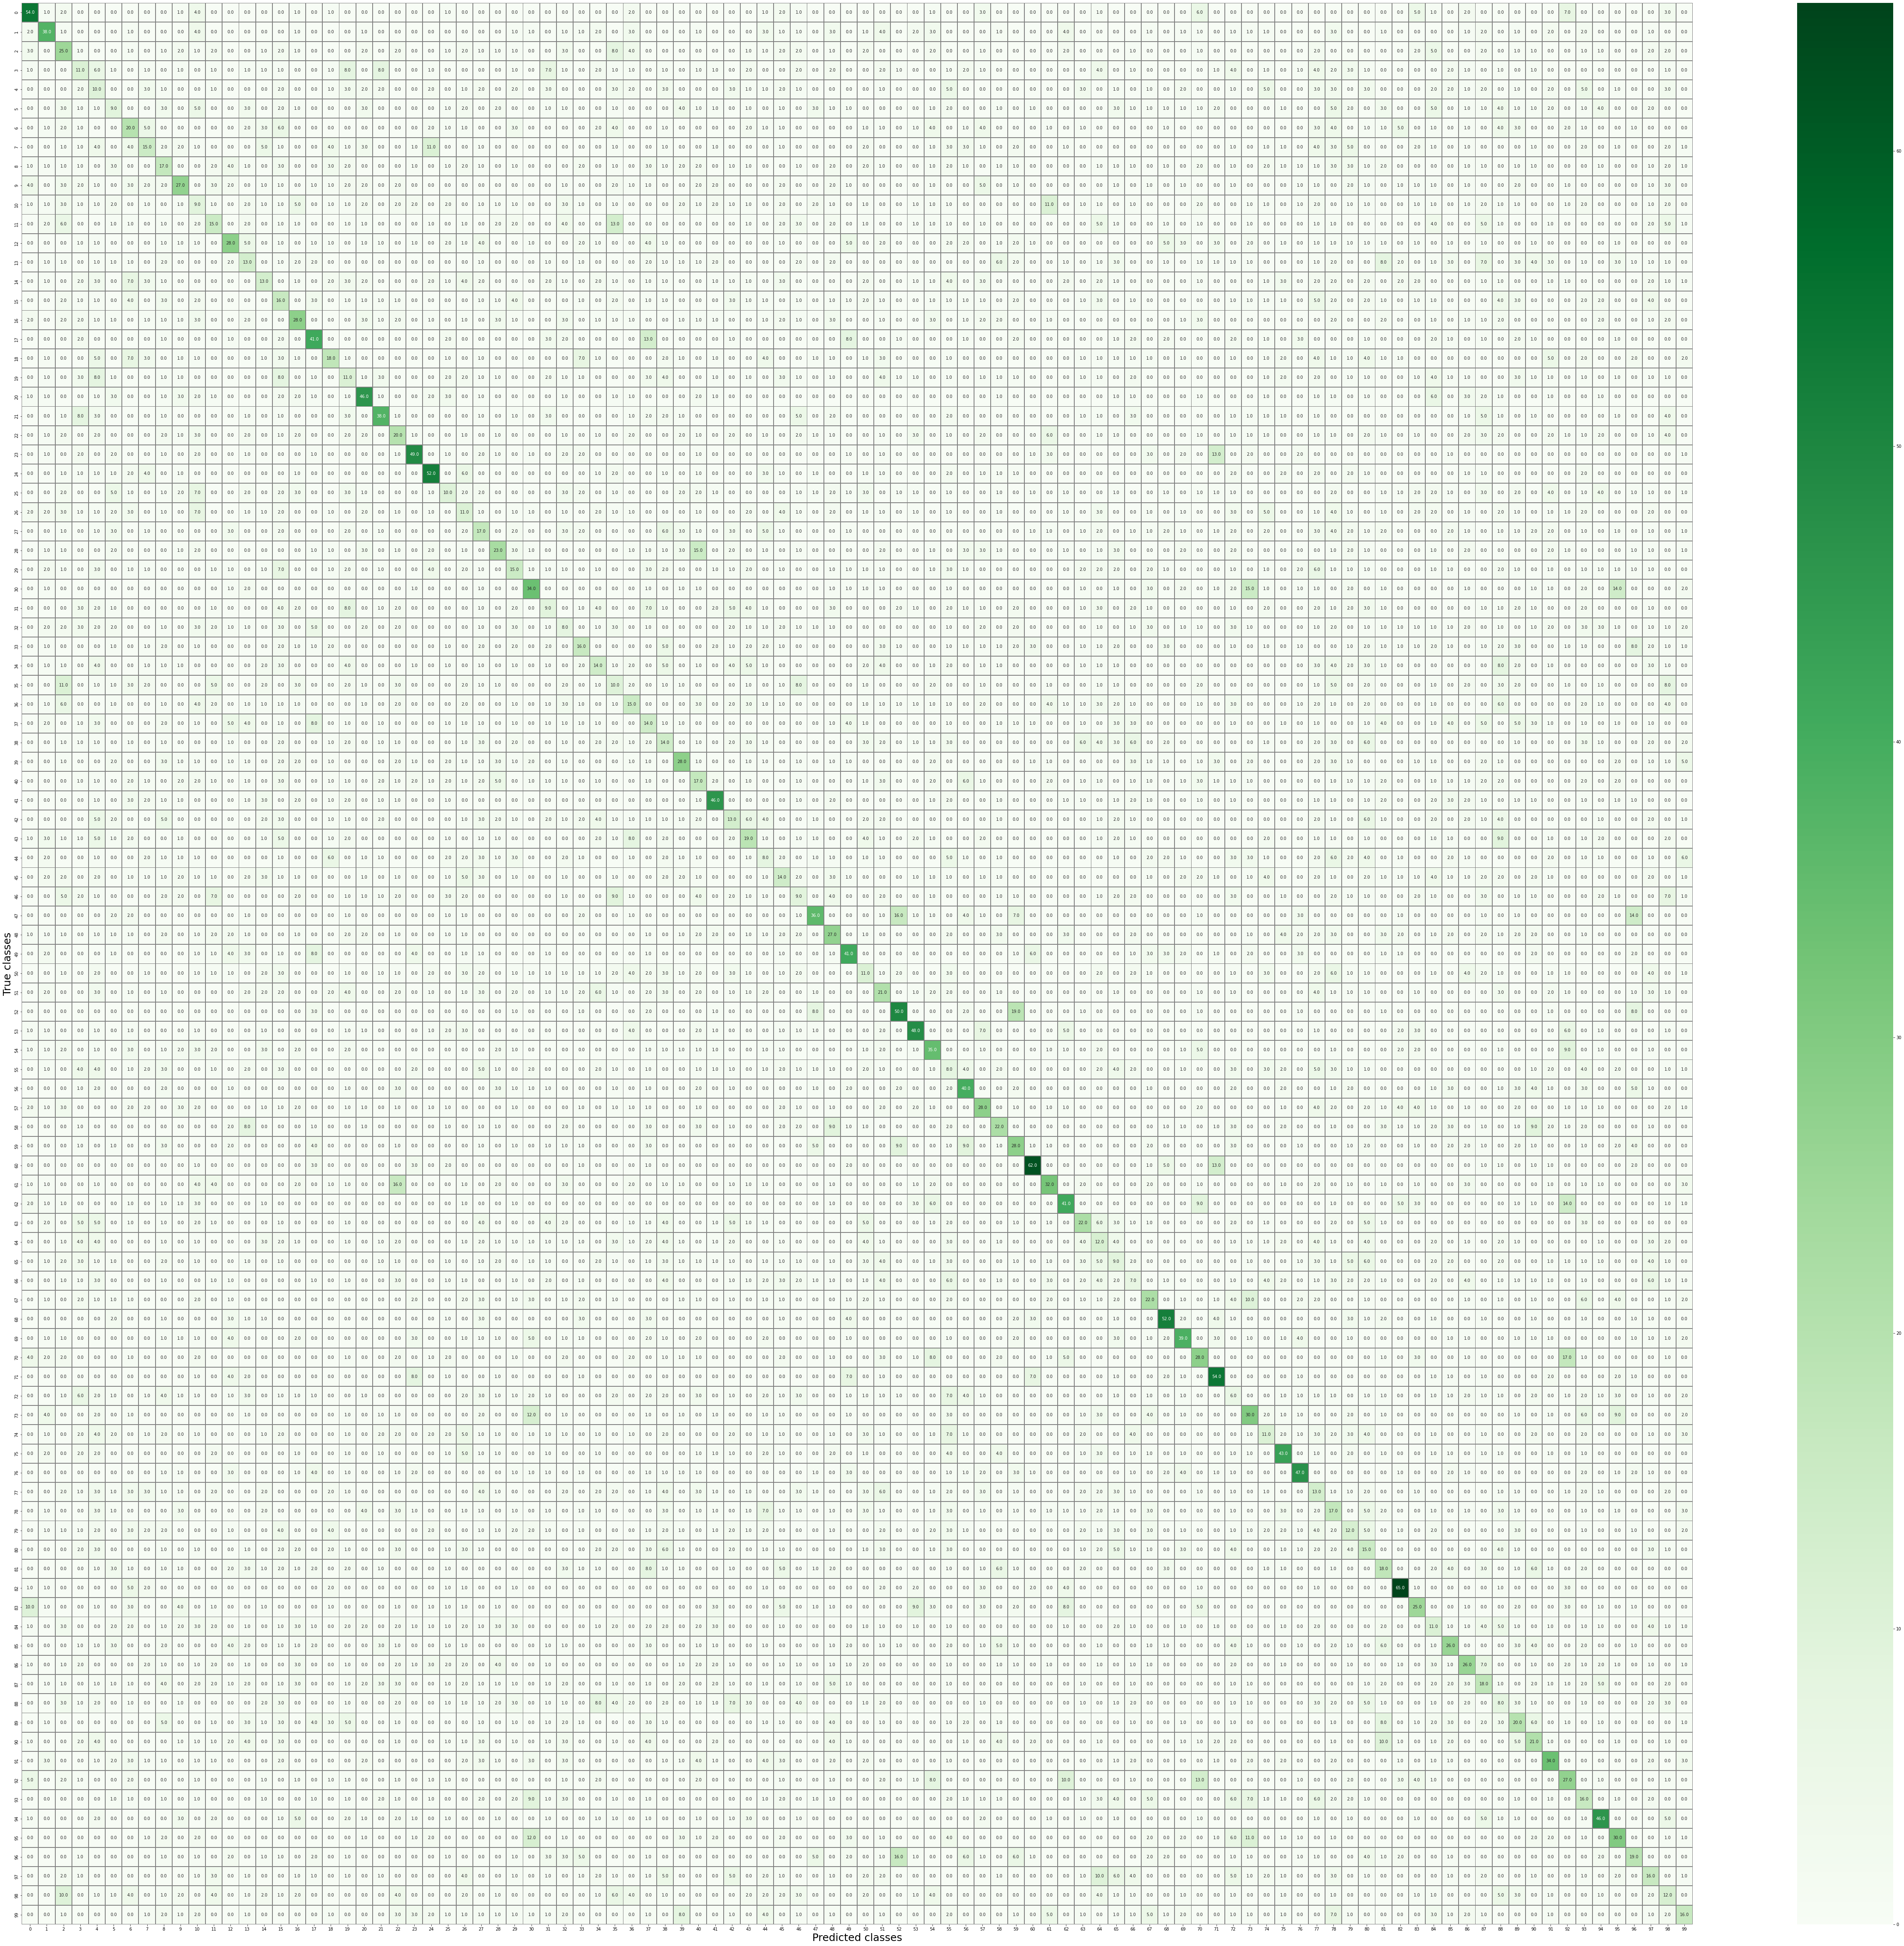

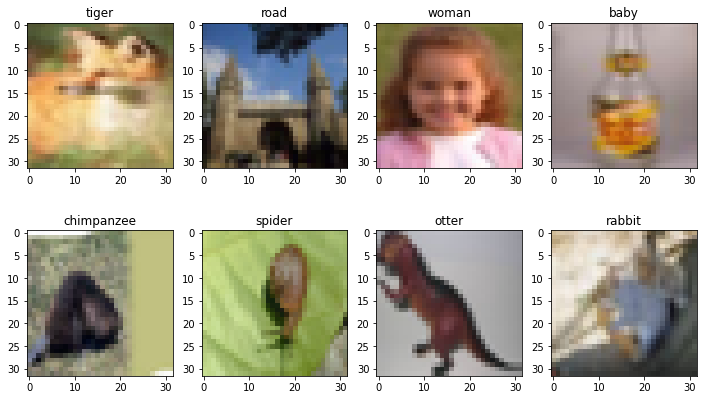

In [1]:
#AlexNet with CIFAR100 Dataset
import numpy as n
import torch
import time
import platform
from keras.datasets import cifar100
(tx, ty), (tsx, tsy) = cifar100.load_data()
print(tx.shape)


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from keras.optimizers import SGD
from keras.metrics import categorical_crossentropy

def alnet():
  m = Sequential()
  m.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', activation='relu', input_shape = (32,32,3)))
  m.add(MaxPooling2D(pool_size = (3,3), strides = 2))
  m.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
  m.add(MaxPooling2D(pool_size = (3,3), strides = 2,padding='same'))
  m.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  m.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  m.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  m.add(MaxPooling2D(pool_size = (3,3), strides = 2,padding='same'))
  m.add(Flatten())
  m.add(Dense(4096, activation = 'relu'))
  m.add(Dropout(0.5))
  m.add(Dense(4096, activation = 'relu'))
  m.add(Dropout(0.5))
  m.add(Dense(100, activation = 'softmax'))
  ot = SGD(learning_rate = 0.1)
  m.compile(loss = categorical_crossentropy,
                optimizer = ot,
                metrics = ['accuracy'])

  return m
am = alnet()
am.summary()

import matplotlib.pyplot as p

from keras.utils import to_categorical

def final(h):
  p.figure(figsize = (10,6))
  p.plot(h.history['accuracy'], color = 'blue', label = 'Training')
  p.plot(h.history['val_accuracy'], color = 'red', label = 'validation')
  p.legend()
  p.title('Final Accuracy')
  p.show()

def tmdl(m, tx, ty, tsx, tsy):
  h = m.fit(tx/255, to_categorical(ty), epochs = 400, batch_size = 256,validation_data = (tsx/255, to_categorical(tsy)))
  score = m.evaluate(tsx/255, to_categorical(tsy), batch_size=1024)

  print("Test Loss: %f" % score[0])
  print("Testing Accuracy: %f" % score[1])
  final(h)
tmdl(am,tx,ty,tsx,tsy)


ystpred = []
for z in range(len(tsx)):
  ig = tsx[z]
  ig = ig.reshape(1,32,32,3)
  img = ig.astype('float32')
  ig = ig/255.0
  vect = am.predict(ig)
  yp = n.argmax(vect)
  ystpred.append(yp)
  
ystpred = n.asarray(ystpred)

from sklearn.metrics import confusion_matrix
import seaborn as s 
confuma = confusion_matrix(tsy, ystpred)

p.figure(figsize = (90,85))
s.heatmap(confuma, linewidths = 0.9, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
p.xlabel('Predicted classes', fontsize = 25)
p.ylabel('True classes', fontsize = 25)
import numpy as np
ip =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']
import random
p.figure(figsize = (12,7))
for y in range(8):
  id = random.randint(0,len(tsx))
  ig = tsx[id]
  ig = ig.reshape(1,32,32,3)
  ig = ig.astype('float32')
  ig = ig/255
  vecp = am.predict(ig)
  vec_p = np.argmax(vecp,axis=1)
  p.subplot(240+1+y)
  p.imshow(tsx[id])
  p.title(ip[vec_p[0]])

